In [62]:
import librosa
import librosa.display

import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt


In [63]:
ambient = np.load('../windows_data/noise_windows.npy')
bell = np.load('../windows_data/bell_windows.npy')

sr = 22050

print(ambient.shape, bell.shape)

(2716, 11025) (47, 11025)


In [64]:
mix_test = 0.5 * ambient[0] + 0.5 * bell[0]

In [65]:
sf.write('sanity_check_mix.wav', mix_test, sr, subtype='PCM_24')

In [66]:
# We're going to use this principle in numpy
test = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3]])
div = np.array([1,2,3])

test * div[:, None]

array([[1, 1, 1, 1],
       [4, 4, 4, 4],
       [9, 9, 9, 9]])

In [67]:
# First of all, set half of noise samples aside
np.random.shuffle(ambient)
noise, to_mix = np.split(ambient, 2)

In [68]:
bell_idxs = np.random.choice(len(bell), len(noise))
weights = np.random.uniform(low=0.1, high=0.5, size=len(noise))

In [69]:
print(bell[bell_idxs].shape, weights.shape, to_mix.shape)
print(weights)

(1358, 11025) (1358,) (1358, 11025)
[0.42079233 0.30021536 0.4484605  ... 0.40674376 0.24896057 0.17715082]


In [70]:
mixed_bells = bell[bell_idxs] * (1 - weights[:, None]) + to_mix * weights[:, None]

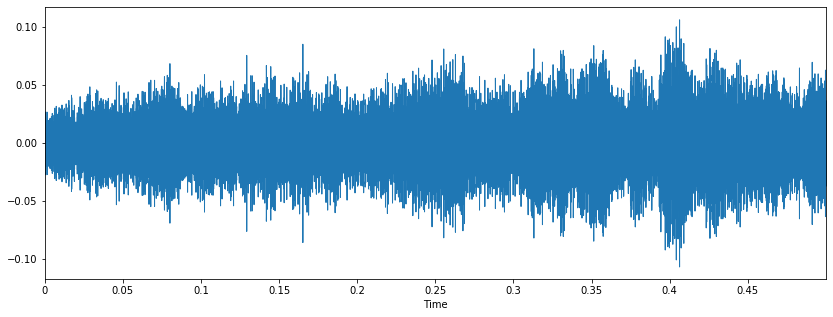

In [71]:
# Sanity check with plot
plt.figure(figsize=(14, 5))
librosa.display.waveplot(mixed_bells[42], sr=sr)

In [72]:
len(mixed_bells)

1358

In [73]:
# Sanity check by noiselistening
sf.write('sanity_check_mixed_bell.wav', mixed_bells[0], sr, subtype='PCM_24')

In [74]:
# Add additional data
def load_clips(folder):
    clips = []
    for bell_name in os.listdir(folder):
        x , sr = librosa.load(os.path.join(folder, bell_name))
        clips.append(x)
    return np.array(clips)
corrected_bell = load_clips('../bell_detector/corrected/bell')
corrected_ambient = load_clips('../bell_detector/corrected/ambient')
print(corrected_ambient.shape, corrected_bell.shape)


(30, 11025) (7, 11025)


In [75]:
mixed_bells = np.vstack([mixed_bells, corrected_bell])
noise = np.vstack([noise, corrected_ambient])

In [76]:
with open('../augmented_data/mixed_bells.npy', 'wb') as f:
    np.save(f, mixed_bells)

In [77]:
with open('../augmented_data/noise.npy', 'wb') as f:
    np.save(f, noise)

In [78]:
len(noise), len(mixed_bells)

(1388, 1365)

In [79]:
train_fraq = int(len(noise) * 0.8)

In [80]:
for i, bell in enumerate(mixed_bells[:train_fraq]):
    sf.write(f'../augmented_data/train/bell/{i}.wav', bell, sr, subtype='PCM_24')

In [81]:
for i, noise_clip in enumerate(noise[:train_fraq]):
    sf.write(f'../augmented_data/train/noise/{i}.wav', noise_clip, sr, subtype='PCM_24')

In [82]:
for i, bell in enumerate(mixed_bells[train_fraq:]):
    sf.write(f'../augmented_data/test/bell/{i}.wav', bell, sr, subtype='PCM_24')

In [83]:
for i, noise_clip in enumerate(noise[train_fraq:]):
    sf.write(f'../augmented_data/test/noise/{i}.wav', noise_clip, sr, subtype='PCM_24')